<a href="https://www.kaggle.com/code/arinjaypathak/detecting-depression-using-lstm-rnn?scriptVersionId=109842460" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv


In [2]:
df=pd.read_csv("/kaggle/input/depression-reddit-cleaned/depression_dataset_reddit_cleaned.csv")
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

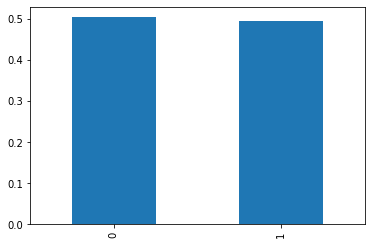

In [4]:
df["is_depression"].value_counts(normalize=True).plot(kind="bar")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [6]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [7]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...


True

In [8]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

Removing stopwords and using lemmatizer

In [9]:
w=WordNetLemmatizer()
for i in range(len(df)):
  review=re.sub('[^a-zA-Z]', ' ', df["clean_text"][i])
  review=review.lower()
  review=review.split()
  review=[w.lemmatize(word) for word in review if not word in set(stopwords.words("english"))]
  review=" ".join(review)
  df["clean_text"][i]=review
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,clean_text,is_depression
0,understand people reply immediately op invitat...,1
1,welcome r depression check post place take mom...,1
2,anyone else instead sleeping depressed stay ni...,1
3,kind stuffed around lot life delaying inevitab...,1
4,sleep greatest comforting escape whenever wake...,1


Finding out vocabulary size of the dataset, by counting unique words

In [10]:
s=set()
for i in range(len(df)):
    k=df["clean_text"][i].split()
    for j in range(len(k)):
        s.add(k[j])
len(s)

18611

Finding out one hot representaion of each sentence

In [11]:
voc_size=18611
onehot_repr1=[one_hot(words,voc_size)for words in df["clean_text"]] 

In [12]:
max=0
for i in onehot_repr1:
    if len(i)>max:
        max=len(i)
max

1844

Converting one hot encodings to word embeddings

In [13]:
sent_length=max
embedded_docs1=pad_sequences(onehot_repr1,padding='pre',maxlen=sent_length)

In [14]:
embedding_vector_features=sent_length*2
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add((LSTM(100)))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

2022-11-02 14:15:50.104417: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 14:15:50.214751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 14:15:50.215524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-02 14:15:50.217081: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1844, 3688)        68637368  
_________________________________________________________________
lstm (LSTM)                  (None, 100)               1515600   
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 70,153,069
Trainable params: 70,153,069
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
Y=df["is_depression"]

In [16]:
Y.shape

(7731,)

In [17]:
embedded_docs1.shape

(7731, 1844)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(embedded_docs1,Y,test_size=0.2,random_state=10,stratify=Y)

In [19]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(6184, 1844) (6184,) (1547, 1844) (1547,)


In [20]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=16)

Epoch 1/5


2022-11-02 14:15:53.302357: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-02 14:15:55.598364: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


387/387 [==============================] - 60s 145ms/step - loss: 0.1480 - accuracy: 0.9500 - val_loss: 0.0961 - val_accuracy: 0.9651
Epoch 2/5
387/387 [==============================] - 56s 145ms/step - loss: 0.0391 - accuracy: 0.9851 - val_loss: 0.1193 - val_accuracy: 0.9554
Epoch 3/5
387/387 [==============================] - 56s 145ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.1440 - val_accuracy: 0.9606
Epoch 4/5
387/387 [==============================] - 56s 145ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 0.1703 - val_accuracy: 0.9612
Epoch 5/5
387/387 [==============================] - 56s 145ms/step - loss: 5.1341e-04 - accuracy: 1.0000 - val_loss: 0.1836 - val_accuracy: 0.9573


In [21]:
Y_pred=model.predict(X_test)

In [22]:
Y_pred=(Y_pred>=0.5).astype("int")

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       780
           1       0.96      0.96      0.96       767

    accuracy                           0.96      1547
   macro avg       0.96      0.96      0.96      1547
weighted avg       0.96      0.96      0.96      1547

[[746  34]
 [ 32 735]]
